In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Data

In [58]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
"dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
"logged_in","num_compromised","root_shell","su_attempted","num_root",
"num_file_creations","num_shells","num_access_files","num_outbound_cmds",
"is_host_login","is_guest_login","count","srv_count","serror_rate",
"srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
"diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
"dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack_types"]

train_data = pd.read_table("Dataset/kddcup.data.txt",header=None, sep=',' ,on_bad_lines='skip' ,names = col_names)
# train_data = pd.read_table("Dataset/kddcup.data_10_percent.txt",header=None, sep=',' ,on_bad_lines='skip' ,names = col_names)
test_data = pd.read_table("Dataset/corrected",header=None, sep=',' ,on_bad_lines='skip' ,names = col_names)

# DataProcessing

In [59]:
conditions = [(train_data['attack_types'] == 'back.'), 
(train_data['attack_types'] == 'buffer_overflow.'), (train_data['attack_types'] == 'ftp_write.'), 
(train_data['attack_types'] == 'guess_passwd.'), (train_data['attack_types'] == 'imap.'), 
(train_data['attack_types'] == 'ipsweep.'), (train_data['attack_types'] == 'land.'), 
(train_data['attack_types'] == 'loadmodule.'), (train_data['attack_types'] == 'multihop.'), 
(train_data['attack_types'] == 'neptune.'), (train_data['attack_types'] == 'nmap.'), 
(train_data['attack_types'] == 'perl.'), (train_data['attack_types'] == 'phf.'), 
(train_data['attack_types'] == 'pod.'), (train_data['attack_types'] == 'portsweep.'), 
(train_data['attack_types'] == 'rootkit.'), (train_data['attack_types'] == 'satan.'), 
(train_data['attack_types'] == 'smurf.'), (train_data['attack_types'] == 'spy.'), 
(train_data['attack_types'] == 'teardrop.'), (train_data['attack_types'] == 'warezclient.'), 
(train_data['attack_types'] == 'warezmaster.')]

choices = ['dos', 'u2r', 'r2l', 'r2l', 'r2l', 'probe', 'dos', 'u2r', 'r2l', 'dos', 'probe', 'u2r', 'r2l', 'dos', 'probe', 
'u2r', 'probe', 'dos', 'r2l', 'dos', 'r2l', 'r2l'] # dos, u2r, r2l, probe

train_data['label'] = np.select(conditions, choices, default='normal')
# train_data.to_csv("Dataset/kddcup.data_10_percent.csv")

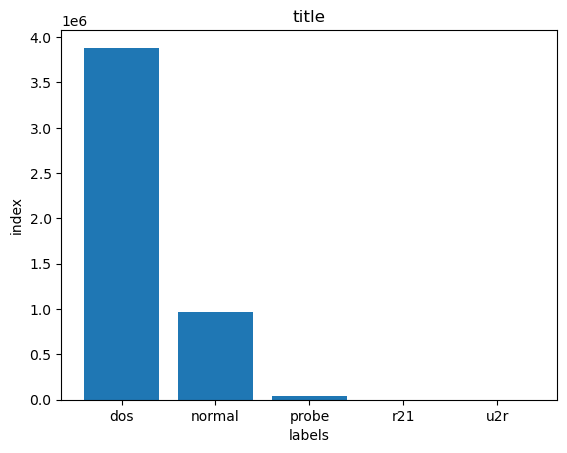

dos       3883370
normal     972780
probe       41102
r2l          1126
u2r            52
Name: label, dtype: int64

In [61]:
train_data_rows = [i for i in train_data.head(len(train_data)).index]
labels = train_data['label']
labels_counts = labels.value_counts()
labels_nums = {"dos":labels_counts[0],"normal":labels_counts[1],"probe":labels_counts[2],"r21":labels_counts[3],"u2r":labels_counts[4]}
labels_keys = [i for i in labels_nums.keys()]
labels_values = [i for i in labels_nums.values()]
x = np.arange(len(labels_keys))

plt.bar(x, labels_values)
plt.xticks(x, labels_keys)
plt.xlabel('labels')
plt.ylabel('index')
plt.title('title')
plt.show()

In [62]:
conditions = [(test_data['attack_types'] == 'back.'), 
(test_data['attack_types'] == 'buffer_overflow.'), (test_data['attack_types'] == 'ftp_write.'), 
(test_data['attack_types'] == 'guess_passwd.'), (test_data['attack_types'] == 'imap.'), 
(test_data['attack_types'] == 'ipsweep.'), (test_data['attack_types'] == 'land.'), 
(test_data['attack_types'] == 'loadmodule.'), (test_data['attack_types'] == 'multihop.'), 
(test_data['attack_types'] == 'neptune.'), (test_data['attack_types'] == 'nmap.'), 
(test_data['attack_types'] == 'perl.'), (test_data['attack_types'] == 'phf.'), 
(test_data['attack_types'] == 'pod.'), (test_data['attack_types'] == 'portsweep.'), 
(test_data['attack_types'] == 'rootkit.'), (test_data['attack_types'] == 'satan.'), 
(test_data['attack_types'] == 'smurf.'), (test_data['attack_types'] == 'spy.'), 
(test_data['attack_types'] == 'teardrop.'), (test_data['attack_types'] == 'warezclient.'), 
(test_data['attack_types'] == 'warezmaster.')]

choices = ['dos', 'u2r', 'r2l', 'r2l', 'r2l', 'probe', 'dos', 'u2r', 'r2l', 'dos', 'probe', 'u2r', 'r2l', 'dos', 'probe', 
'u2r', 'probe', 'dos', 'r2l', 'dos', 'r2l', 'r2l'] # dos, u2r, r2l, probe

test_data['label'] = np.select(conditions, choices, default='normal')
# test_data.to_csv("Dataset/corrected.csv")

In [63]:
num_features = ["duration", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", 
                "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells",
                "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", 
                "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
                "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", 
                "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
                "dst_host_rerror_rate", "dst_host_srv_rerror_rate"]
train_x = train_data[num_features].astype(float)
test_x = test_data[num_features].astype(float)
train_x.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,...,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06
mean,4.834244e+01,1.834621e+03,1.093623e+03,5.716117e-06,6.487793e-04,7.961735e-06,1.243766e-02,3.205109e-05,1.435288e-01,8.088306e-03,...,2.329811e+02,1.892143e+02,7.537134e-01,3.071111e-02,6.050521e-01,6.464108e-03,1.780912e-01,1.778859e-01,5.792782e-02,5.765943e-02
std,7.233299e+02,9.414312e+05,6.450124e+05,2.390834e-03,4.285434e-02,7.215084e-03,4.689782e-01,7.299408e-03,3.506114e-01,3.856481e+00,...,6.402086e+01,1.059127e+02,4.111859e-01,1.085432e-01,4.809877e-01,4.125978e-02,3.818382e-01,3.821775e-01,2.309428e-01,2.309777e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,4.900000e+01,4.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.032000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,4.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.832900e+04,1.379964e+09,1.309937e+09,1.000000e+00,3.000000e+00,1.400000e+01,7.700000e+01,5.000000e+00,1.000000e+00,7.479000e+03,...,2.550000e+02,2.550000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [64]:
train_y = train_data['label']
test_y = test_data['label']

In [65]:
#Ignoring the deprecation warnings
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) 

#Rescaling the data
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

min_max_scaler = min_max_scaler.fit(train_x)
train_x = min_max_scaler.transform(train_x)

min_max_scaler = min_max_scaler.fit(test_x)
test_x = min_max_scaler.transform(test_x)

train_x

array([[0.00000000e+00, 1.55801178e-07, 3.44108046e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.17394376e-07, 3.45665373e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.71018968e-07, 9.37449377e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.57975148e-07, 2.75585688e-06, ...,
        1.00000000e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.58699805e-07, 9.42029748e-07, ...,
        1.00000000e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.58699805e-07, 8.38207993e-07, ...,
        1.00000000e-02, 0.00000000e+00, 0.00000000e+00]])

# Training

In [66]:
#Training a classifier
from sklearn.ensemble import RandomForestClassifier
import time
clf = RandomForestClassifier(n_estimators=100 ,random_state = 0)
t0 = time.time()
clf.fit(train_x, train_y)
tt = time.time() - t0
pred = clf.predict(test_x)
print ("Classifier trained in {} seconds.".format(round(tt, 3)))

Classifier trained in 562.283 seconds.


# Accuracy_score

In [67]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred, test_y)
print ("Accuracy is {}.".format(round(acc,4)))

Accuracy is 0.9733.


# Precision_score

In [68]:
from sklearn.metrics import precision_score
precision_score(test_y, pred, average='macro')

D:\Users\gcobs\anaconda3\envs\MLFN\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5847765223186869

In [69]:
precision_score(test_y, pred, average='micro')

0.9733272460124297

In [70]:
precision_score(test_y, pred, average='weighted')

D:\Users\gcobs\anaconda3\envs\MLFN\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9618725369659131

In [71]:
precision_score(test_y, pred, average=None)

D:\Users\gcobs\anaconda3\envs\MLFN\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.99506763, 0.92632703, 0.69479565, 0.30769231, 0.        ])

# Recall_score

In [72]:
from sklearn.metrics import recall_score
recall_score(test_y, pred, average='macro')

0.593550364313737

In [73]:
recall_score(test_y, pred, average='micro')

0.9733272460124297

In [74]:
recall_score(test_y, pred, average='weighted')

0.9733272460124297

In [75]:
recall_score(test_y, pred, average=None)

array([9.99234207e-01, 9.73739946e-01, 9.94110223e-01, 6.67445353e-04,
       0.00000000e+00])

# F1_score

In [76]:
from sklearn.metrics import f1_score
f1_score(test_y, pred, average='macro')

0.5531701157374902

In [77]:
f1_score(test_y, pred, average='micro')

0.9733272460124297

In [78]:
f1_score(test_y, pred, average='weighted')

0.9642980858465812

In [79]:
f1_score(test_y, pred, average=None)

array([0.99714657, 0.94944193, 0.81793008, 0.001332  , 0.        ])

In [80]:
back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l


SyntaxError: invalid syntax (2849511438.py, line 1)